# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']


## Continuous Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5efea2d68>,
      dtype=object)

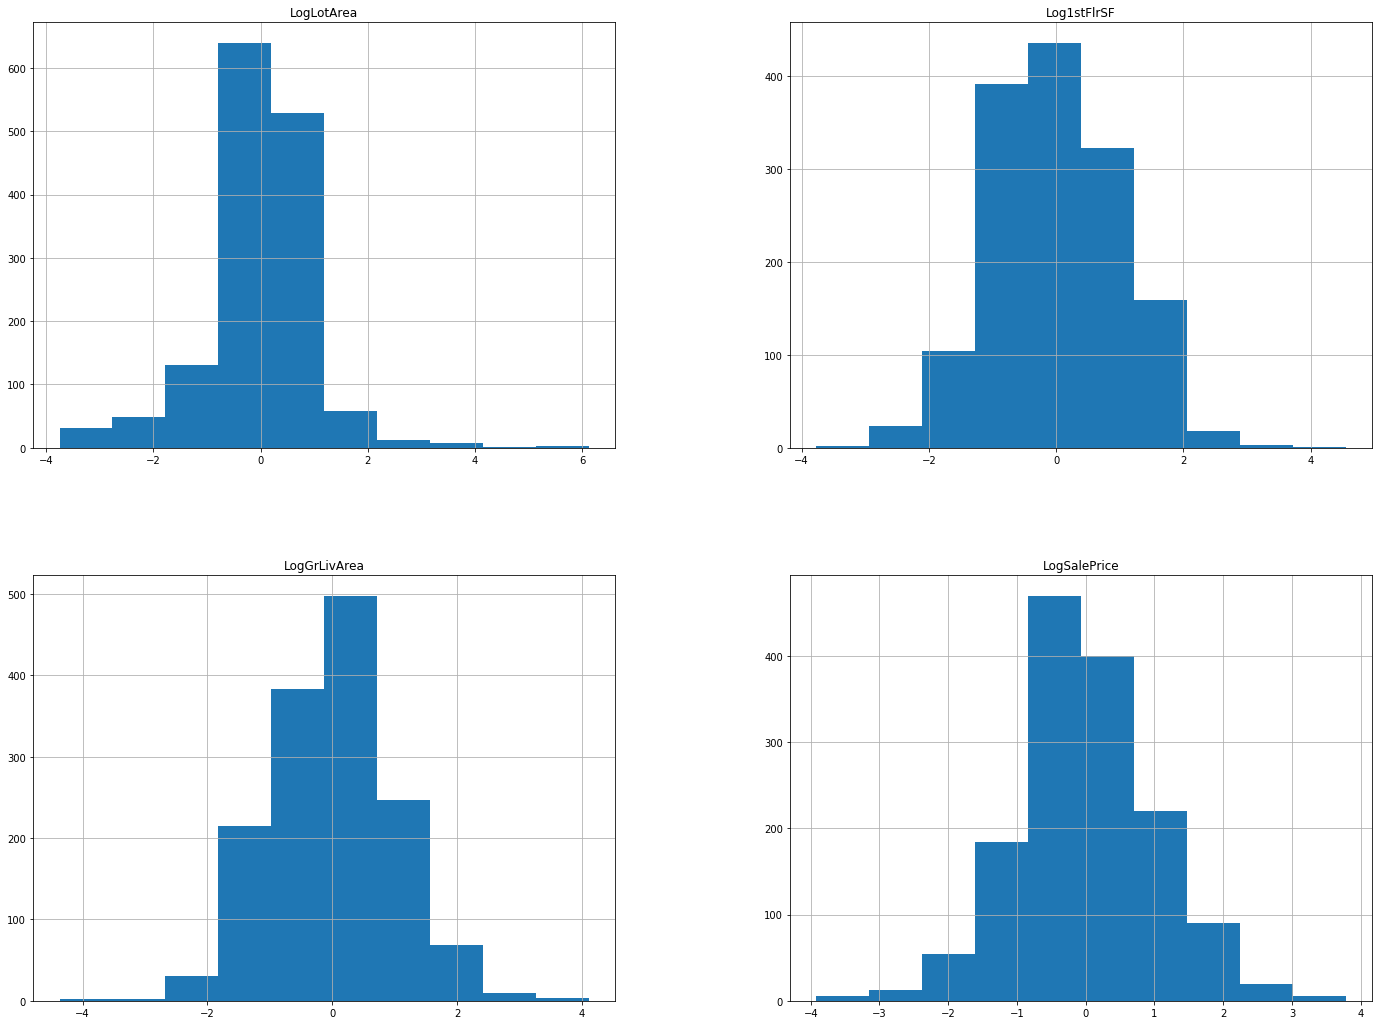

In [2]:
# Log transform and normalize
import sklearn
from sklearn.preprocessing import StandardScaler
ames_log = pd.DataFrame([])
ames_log['LogLotArea'] = np.log(ames['LotArea'])
ames_log['Log1stFlrSF'] = np.log(ames['1stFlrSF'])
ames_log['LogGrLivArea'] = np.log(ames['GrLivArea'])
ames_log['LogSalePrice'] = np.log(ames['SalePrice'])
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(ames_log), columns=ames_log.columns)
scaled.hist(figsize=(24,18))

## Categorical Features

In [3]:
# One hot encode categoricals
ames_onehot = pd.get_dummies(ames[categoricals], drop_first=True)

In [4]:
ames_onehot.head()

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Combine Categorical and Continuous Features

In [5]:
# combine features into a single dataframe called preprocessed
preprocessed = pd.concat([scaled, ames_onehot], axis=1)
preprocessed.head()

,LogLotArea,Log1stFlrSF,LogGrLivArea,LogSalePrice,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,-0.133231,-0.803570,0.529260,0.560068,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.113442,0.418585,-0.381846,0.212764,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.420061,-0.576560,0.659675,0.734046,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.103347,-0.439287,0.541511,-0.437382,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.878409,0.112267,1.282191,1.014651,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


## Run a linear model with SalePrice as the target variable in statsmodels

In [6]:
# Your code here
import statsmodels.api as sm
predictors = preprocessed.drop('LogSalePrice', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(preprocessed['LogSalePrice'],predictors_int).fit()
model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:34:45   Log-Likelihood:                -738.64
No. Observations:                1460   AIC:                             1573.
Df Residuals:                    1412   BIC:                             1827.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1317      0.263     -0.500      0.617      -0.648       0.385
LogLotArea               0.1033      0.019      5.475      0.000       0.066       0.140
Log1stFlrSF              0.1371      0.016      8.584      0.000       0.106       0.168
LogGrLivArea             0.3768      0.016     24.114      0.000       0.346       0.407
BldgType_2fmCon         -0.1715      0.079     -2.173      0.030      -0.326      -0.017
BldgType_Duplex         -0.4205      0.062     -6.813      0.000      -0.542      -0.299
BldgType_Twnhs          -0.1404      0.093     -1.513      0.130      -0.322       0.042
BldgType_TwnhsE         -0.0512      0.060     -0.858      0.391      -0.168       0.066
KitchenQual_Fa          -1.0002      0.088    -11.315      0.000      -1.174      -0.827
KitchenQual_Gd          -0.3822      0.050     -7.613      0.000      -0.481      -0.284
KitchenQual_TA          -0.6695      0.055    -12.111      0.000      -0.778      -0.561
SaleType_CWD             0.2286      0.215      1.061      0.289      -0.194       0.651
SaleType_Con             0.5863      0.304      1.927      0.054      -0.010       1.183
SaleType_ConLD           0.3152      0.155      2.029      0.043       0.010       0.620
SaleType_ConLI           0.0331      0.195      0.169      0.865      -0.350       0.416
SaleType_ConLw           0.0161      0.196      0.082      0.935      -0.368       0.400
SaleType_New             0.3000      0.079      3.803      0.000       0.145       0.455
SaleType_Oth             0.1179      0.246      0.480      0.631      -0.364       0.599
SaleType_WD              0.1749      0.065      2.676      0.008       0.047       0.303
MSZoning_FV              1.0670      0.193      5.526      0.000       0.688       1.446
MSZoning_RH              0.8771      0.194      4.512      0.000       0.496       1.258
MSZoning_RL              0.9964      0.162      6.151      0.000       0.679       1.314
MSZoning_RM              1.1027      0.152      7.264      0.000       0.805       1.400
Street_Pave             -0.2132      0.180     -1.182      0.237      -0.567       0.141
Neighborhood_Blueste     0.0530      0.318      0.167      0.868      -0.571       0.677
Neighborhood_BrDale     -0.4629      0.171     -2.711      0.007      -0.798      -0.128
Neighborhood_BrkSide    -0.6500      0.137     -4.735      0.000      -0.919      -0.381
Neighborhood_ClearCr    -0.2103      0.144     -1.456      0.146      -0.494       0.073
Neighborhood_CollgCr    -0.0761      0.119     -0.641      0.522      -0.309       0.157
Neighborhood_Crawfor    -0.0824      0.129     -0.638      0.523      -0.336       0.171
Neighborhood_Edwards    -0.7615      0.124     -6.143      0.000      -1.005      -0.518
Neighborhood_Gilbert    -0.0980      0.126     -0.777    

## Run the same model in scikit-learn

In [7]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels
from sklearn.linear_model import LinearRegression
y = preprocessed['LogSalePrice']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression()

In [8]:
linreg.predict(predictors)

array([ 0.44358222,  0.20978834,  0.58099458, ...,  0.94682891,
       -0.31509479, -0.67996425])

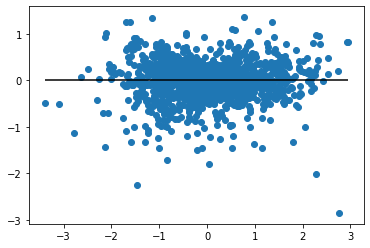

In [9]:
preds = linreg.predict(predictors)
residuals = y - preds
plt.scatter(preds, residuals)
plt.hlines(0, preds.min(), preds.max())

In [10]:
linreg.coef_

array([ 0.10327192,  0.1371289 ,  0.37682133, -0.17152105, -0.42048287,
       -0.14038921, -0.05121949, -1.00020261, -0.38215288, -0.6694784 ,
        0.22855565,  0.58627941,  0.31521364,  0.03310544,  0.01609215,
        0.29995612,  0.1178827 ,  0.17486316,  1.06700108,  0.8771105 ,
        0.99643261,  1.10266268, -0.21318409,  0.0529509 , -0.46287108,
       -0.65004527, -0.21026441, -0.0761186 , -0.08236455, -0.76152767,
       -0.09803299, -0.96216285, -0.6920628 , -0.25540919, -0.4408245 ,
       -0.01595592, -0.26772132,  0.36325607,  0.36272091, -0.93537011,
       -0.70000301, -0.47559431, -0.23317719,  0.09506225,  0.42971796,
        0.00569435,  0.12766986])

In [11]:
linreg.intercept_

-0.13174249418744435

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

In [12]:
used_cols = [*continuous, *categoricals]
used_cols

['LotArea',
 '1stFlrSF',
 'GrLivArea',
 'SalePrice',
 'BldgType',
 'KitchenQual',
 'SaleType',
 'MSZoning',
 'Street',
 'Neighborhood']

In [13]:
new_row = pd.DataFrame(columns=used_cols)
new_row = new_row.append({"LotArea": 14977,
                          '1stFlrSF': 1976,
                          'GrLivArea': 1976,
                          'BldgType': '1Fam',
                          'KitchenQual': 'Gd',
                          'SaleType': 'New',
                          'MSZoning': 'RL',
                          'Street': 'Pave',
                          'Neighborhood': 'NridgHt'},
                          ignore_index=True)
new_row.head()

,LotArea,1stFlrSF,GrLivArea,SalePrice,BldgType,KitchenQual,SaleType,MSZoning,Street,Neighborhood
0,14977,1976,1976,NaN,1Fam,Gd,New,RL,Pave,NridgHt


In [14]:
new_row_cont = new_row[continuous]

In [15]:
log_names = [f'{column}_log' for column in new_row_cont.columns]

new_row_log = np.log(new_row_cont.astype(float))
new_row_log.columns = log_names
new_row_log = scaler.transform(new_row_log)
new_row_log

array([[0.97324786, 1.83025654, 0.96286942,        nan]])

In [16]:
new_row_log_norm = pd.DataFrame(columns=log_names)
new_row_log_norm = new_row_log_norm.append(dict(zip(log_names, new_row_log[0])), ignore_index=True)
new_row_log_norm

,LotArea_log,1stFlrSF_log,GrLivArea_log,SalePrice_log
0,0.973248,1.830257,0.962869,NaN


In [17]:
new_row_cat = new_row[categoricals]
new_row_cat

,BldgType,KitchenQual,SaleType,MSZoning,Street,Neighborhood
0,1Fam,Gd,New,RL,Pave,NridgHt


In [18]:
new_row_ohe = pd.DataFrame(columns = ames_onehot.columns)
new_row_ohe

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker


In [19]:
ohe_dict = {}
for col_type in new_row_cat.columns:
    col_list = [c for c in new_row_ohe.columns.to_list() if col_type in c]
    for x in col_list:
        if new_row_cat[col_type][0] in x:
            ohe_dict[x] = 1
        else:
            ohe_dict[x] = 0

In [20]:
new_row_ohe = new_row_ohe.append(ohe_dict, ignore_index=True)
new_row_ohe

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [43]:
new_row_processed = pd.concat([new_row_log_norm, new_row_ohe], axis=1)
new_row_processed = new_row_processed.drop(['SalePrice_log'], axis=1)
new_row_processed

,LotArea_log,1stFlrSF_log,GrLivArea_log,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.973248,1.830257,0.962869,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [44]:
linreg.predict(new_row_processed)

array([1.64635016])

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!